In [1]:
import numpy as np
from Neural_Network import NNet
from Utils import plot_cost,process_data

In [2]:
# Process data. Data must be in Folder "./Data/fashion/"
PCA = 0.99 # explained variance kept with PCA
process_data(PCA,True)

In [3]:
# load data
x_train = np.load(f'Data/Processed/x_train_{PCA}.npy')
x_test = np.load(f'Data/Processed/x_test_{PCA}.npy')
y_train = np.load('Data/Processed/y_train_hot.npy')
y_test = np.load('Data/Processed/y_test_hot.npy')

In [12]:
# Create models
func = 'relu'
feats = x_train.shape[1]
l0 = NNet([feats, 10], func)
l1_10 = NNet([feats, 10, 10], func)
l1_20 = NNet([feats, 20, 10], func)
l1_40 = NNet([feats, 40, 10], func)
l2_10 = NNet([feats, 10, 10, 10], func)
l2_20 = NNet([feats, 20, 20, 10], func)
l2_40 = NNet([feats, 40, 40, 10], func)


In [13]:
# helper function for training and  plotting
def train_model(model_: NNet, batch, epochs: int, step: int, name: str):
    model_.step = step
    cost_list = model_.train(x_train.T, y_train.T, x_test.T, y_test.T, batch, epochs)
    plot_cost(cost_list, step, epochs, batch, name)
    return cost_list

100%|██████████| 200/200 [02:36<00:00,  1.28it/s, cost=0.369, train=87.1, test=84.3]


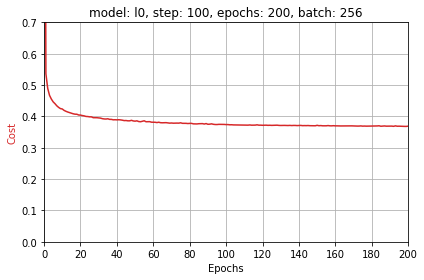

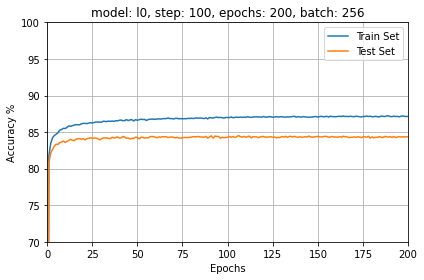

100%|██████████| 200/200 [02:51<00:00,  1.17it/s, cost=0.326, train=88.3, test=85.7]


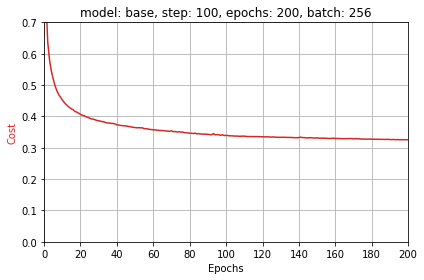

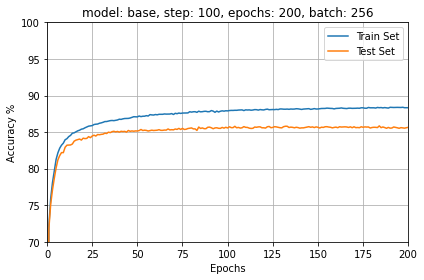

100%|██████████| 200/200 [03:08<00:00,  1.06it/s, cost=0.264, train=90.6, test=87.1]


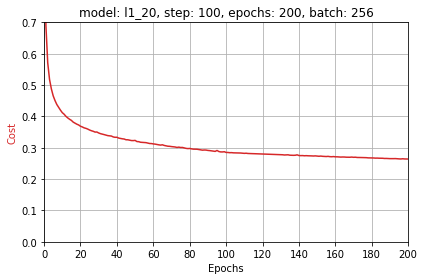

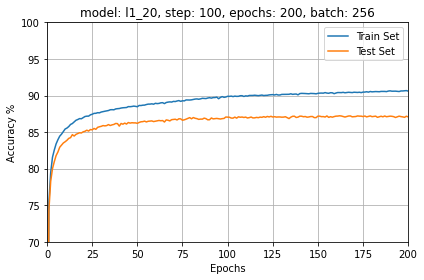

100%|██████████| 200/200 [03:23<00:00,  1.02s/it, cost=0.209, train=92.8, test=87.7]


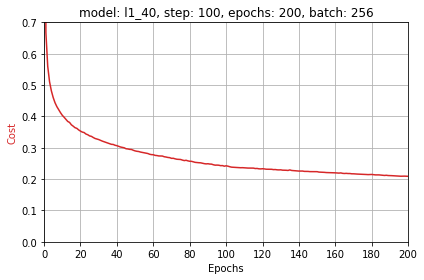

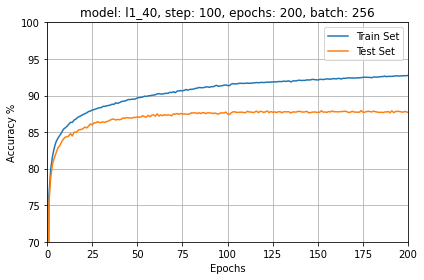

100%|██████████| 200/200 [02:56<00:00,  1.13it/s, cost=0.308, train=89, test=85.8]  


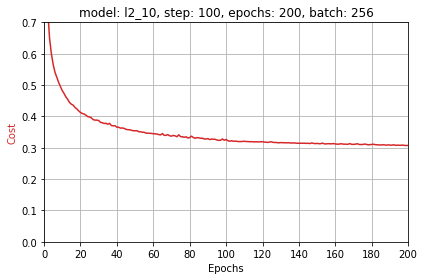

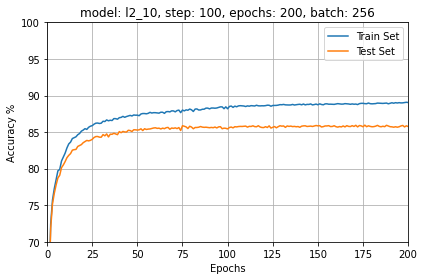

100%|██████████| 200/200 [03:15<00:00,  1.02it/s, cost=0.236, train=91.5, test=87]  


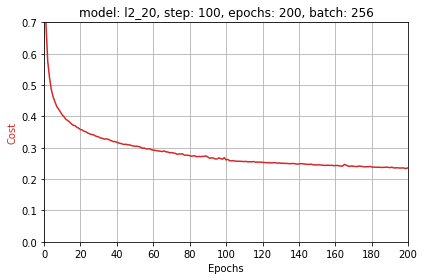

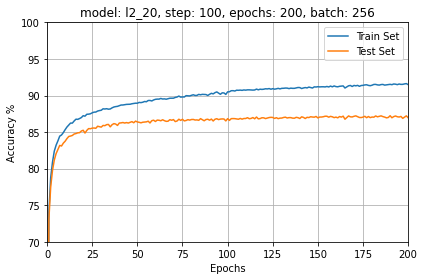

100%|██████████| 200/200 [03:33<00:00,  1.07s/it, cost=0.162, train=94.4, test=87.9]


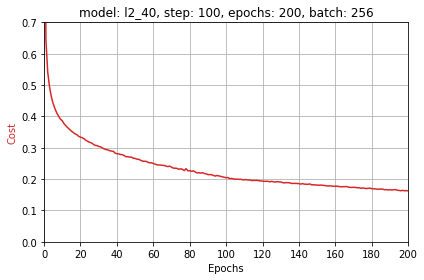

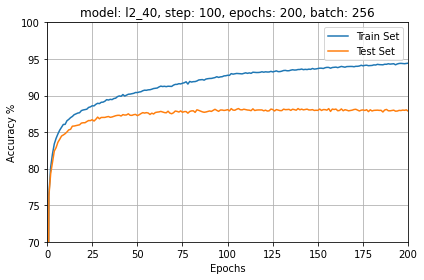

In [14]:
#train and plot all models
batch_ = 256
epochs_ = 200
step_ = 100

cost_l0 = train_model(l0, batch_, epochs_, step_, 'l0')
cost_l1_10 = train_model(l1_10, batch_, epochs_, step_, 'base')
cost_l1_20 = train_model(l1_20, batch_, epochs_, step_, 'l1_20')
cost_l1_40 = train_model(l1_40, batch_, epochs_, step_, 'l1_40')
cost_l2_10 = train_model(l2_10, batch_, epochs_, step_, 'l2_10')
cost_l2_20 = train_model(l2_20, batch_, epochs_, step_, 'l2_20')
cost_l2_40 = train_model(l2_40, batch_, epochs_, step_, 'l2_40')

In [15]:
# prediction time for each model
import time
times = []
models = [l1_10, l1_20, l1_40, l2_10, l2_20, l2_40]
for model in models:
    now = time.perf_counter()
    model.feed(x_test.T)
    end = time.perf_counter()
    times.append(f"{end - now:0.5f}")

print(times)

['0.01298', '0.00974', '0.01617', '0.00723', '0.01149', '0.01772']


In [18]:
cost_lists = [cost_l1_10,cost_l1_20,cost_l1_40,cost_l2_10,cost_l2_20,cost_l2_40]
acc_test = [[cost_list[i][2] for i in range(epochs_+1)] for cost_list in cost_lists ]

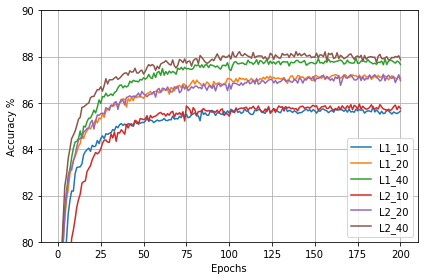

In [19]:
# plot test accuracy during training for all models
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
labels = ['L1_10','L1_20','L1_40','L2_10','L2_20','L2_40']
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy %', color='k')
ax.set_ylim([80, 90])
for at,label in zip(acc_test,labels):
    ax.plot(at,label=label)
ax.legend(loc='best')
ax.grid()
fig.tight_layout()
plt.savefig('./Plots/test_acc_all.svg', dpi=300, format='svg')
plt.show()
